In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

% matplotlib inline

In [7]:
diretorios = ['P10', 'P15', 'P20', 'P25']
bufferDataFile = 'bufferData.csv'
taxaMacDataFile = 'taxaMACData.csv'

# folder = diretorios[3]
folder = "PFBuffer"

dfData = pd.read_csv(os.path.join('../Simulations',folder,taxaMacDataFile),delimiter="|") #index_col='Tempo'

dfData.head()

,Tempo,Nó sensor,TaxaMAC,Buffer,Repeticao
0,1.718921,5,60,0.000,1
1,1.952451,2,80,0.000,1
2,2.004638,1,100,0.000,1
3,2.188246,4,100,3.125,1
4,2.207543,3,100,0.000,1


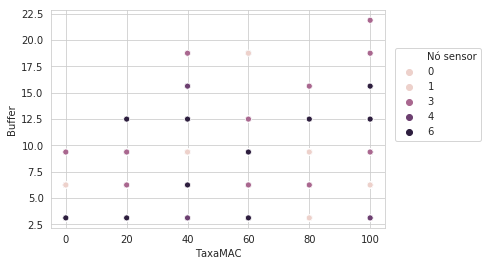

In [15]:
df = dfData[dfData["Buffer"] != 0.0]
ax = sns.scatterplot(x="TaxaMAC",y="Buffer",hue="Nó sensor",data=df)
ax.legend(loc=(1.03,0.4))

In [9]:
df.head()

,Tempo,Nó sensor,TaxaMAC,Buffer,Repeticao
1,1.952451,2,80,0.0,1
7,2.687103,2,80,0.0,1
12,3.391678,2,100,0.0,1
17,4.352517,2,100,0.0,1
23,4.869653,2,60,0.0,1


In [10]:
dfPivot = dfData.pivot(index='Tempo',columns='Nó sensor',values=['TaxaMAC','Buffer'])
dfPivot.fillna(value=0,inplace=True)
dfPivot.head()

# ax = dfPivot['TaxaMAC'].plot(subplots=True, figsize=(25, 10),ylim=(0,100),legend=True,style='-')
# ax = dfPivot['Buffer'].plot(subplots=True, figsize=(25, 10),ylim=(0,100),legend=True,style='.',ax=ax)

# plt.savefig('saida.png')
# plt.tight_layout()

TaxaMAC                        Buffer                        
Nó sensor       1     2     3     4    5      1      2    3      4    5
Tempo                                                                  
1.483394      0.0   0.0  40.0   0.0  0.0    0.0  0.000  0.0  0.000  0.0
1.486363     40.0   0.0   0.0   0.0  0.0    0.0  0.000  0.0  0.000  0.0
1.523649      0.0   0.0  40.0   0.0  0.0    0.0  0.000  0.0  0.000  0.0
1.686526      0.0   0.0   0.0  80.0  0.0    0.0  0.000  0.0  3.125  0.0
1.701136      0.0  80.0   0.0   0.0  0.0    0.0  3.125  0.0  0.000  0.0

In [11]:
df = dfData[dfData['Nó sensor'] == 2 ]
df.head()

,Tempo,Nó sensor,TaxaMAC,Buffer,Repeticao
1,1.952451,2,80,0.0,1
7,2.687103,2,80,0.0,1
12,3.391678,2,100,0.0,1
17,4.352517,2,100,0.0,1
23,4.869653,2,60,0.0,1


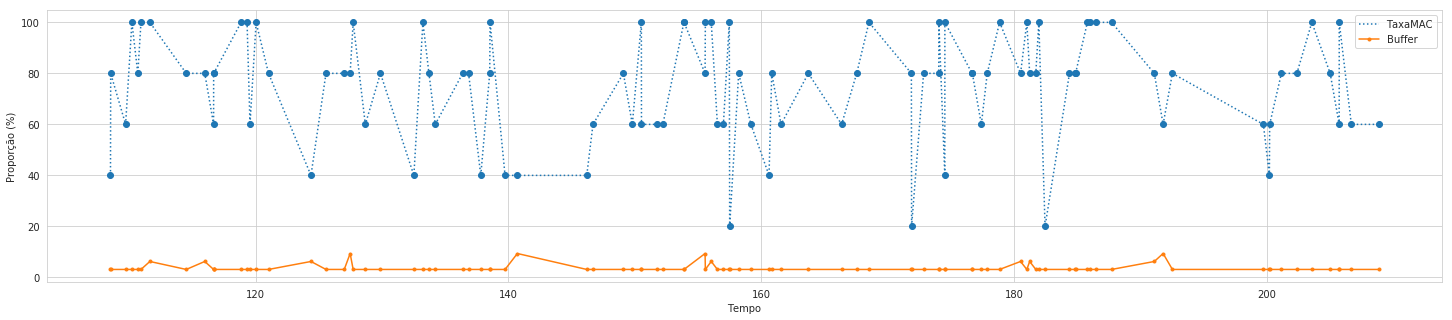

In [16]:
plt.figure(figsize=(25,5))
ax = plt.subplot()
ax = df[['Tempo','TaxaMAC']].iloc[100:200].plot(x='Tempo',ax=ax,style=':',marker='o')
ax = df[['Tempo','Buffer']].iloc[100:200].plot(x='Tempo',ax=ax,style='-',marker='.')
ax.yaxis.label.set_text("Proporção (%)")

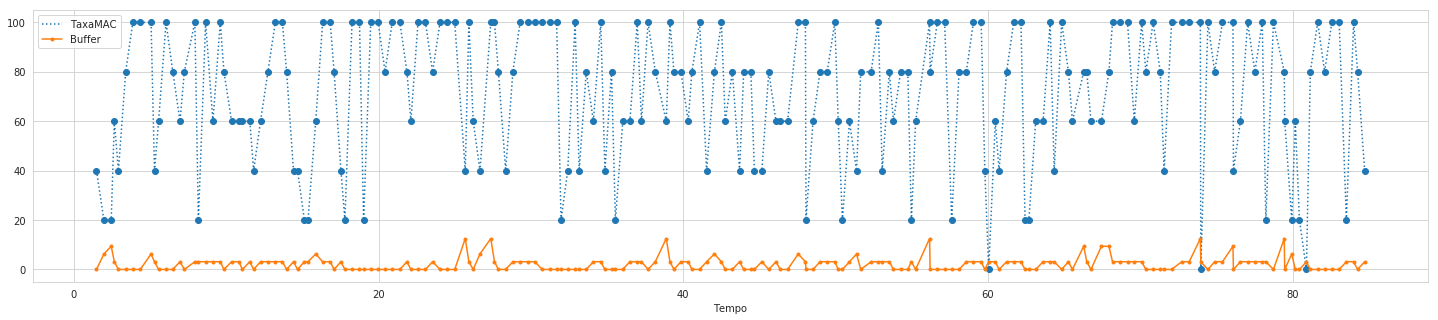

In [21]:
NoSensor = 3
repeticao = 5

df = dfData[(dfData['Nó sensor'] == NoSensor) & (dfData['Repeticao'] == repeticao )]
plt.figure(figsize=(25,5))
ax = plt.subplot()

T_inferior = 0
T_superior = T_inferior + 200

ax = df[['Tempo','TaxaMAC']].iloc[T_inferior:T_superior].plot(x='Tempo',ax=ax,style=':',marker='o')
ax = df[['Tempo','Buffer']].iloc[T_inferior:T_superior].plot(x='Tempo',ax=ax,style='-',marker='.')

# ax = df[['Tempo','TaxaMAC']].plot(x='Tempo',ax=ax,style=':',marker='o')
# ax = df[['Tempo','Buffer']].plot(x='Tempo',ax=ax,style='-',marker='.')

ax.get_figure().savefig('serieTemporal-TaxaBuffer-vs-TaxaMAC-N{0}-I{1}-F{2}'.format(NoSensor,T_inferior, T_superior))

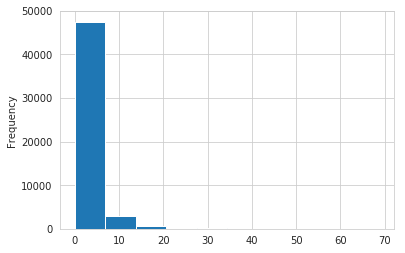

In [8]:
df = dfData[dfData['Nó sensor'] == 3 ]
df['Buffer'].plot.hist()

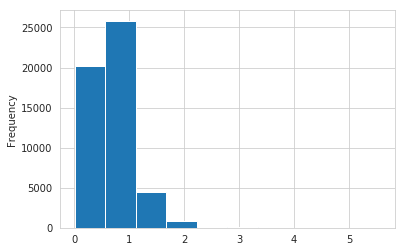

In [9]:
diff = df.diff()
diff.head()

diff['Tempo'].plot.hist()